Reading the ARFF File

In [31]:
from scipy.io.arff import loadarff
import pandas as pd, numpy as np

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

**Question 1**

Separate the features and the output to use the "f_classif" function and place the f-value and p-value in a table to assess discriminative power.

In [32]:
from sklearn.feature_selection import f_classif

variables = df.drop('class', axis=1)
target = df['class']

fvalues, pvalues = f_classif(variables, target)

fvalue_df = pd.DataFrame({'variable': variables.columns, 'fvalues': fvalues, 'pvalues': pvalues})
fvalue_df.head()

,variable,fvalues,pvalues
0,pelvic_incidence,98.539709,8.752849e-34
1,pelvic_tilt,21.299194,2.176879e-09
2,lumbar_lordosis_angle,114.982840,5.357329e-38
3,sacral_slope,89.643953,2.175670e-31
4,pelvic_radius,16.866935,1.121996e-07


Plot the class-conditional probability density functions of these two input variables.

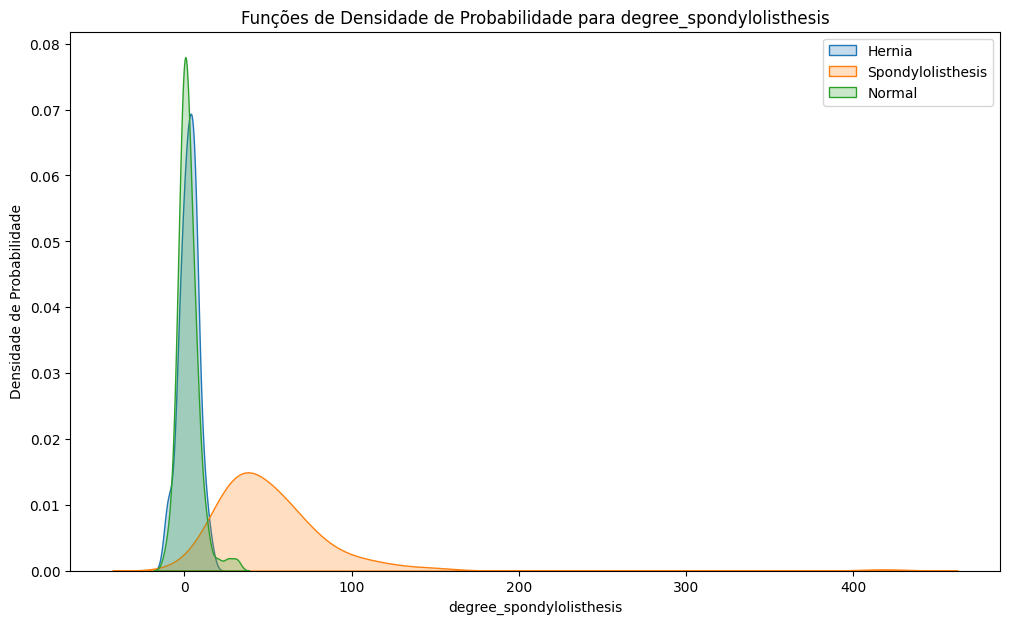

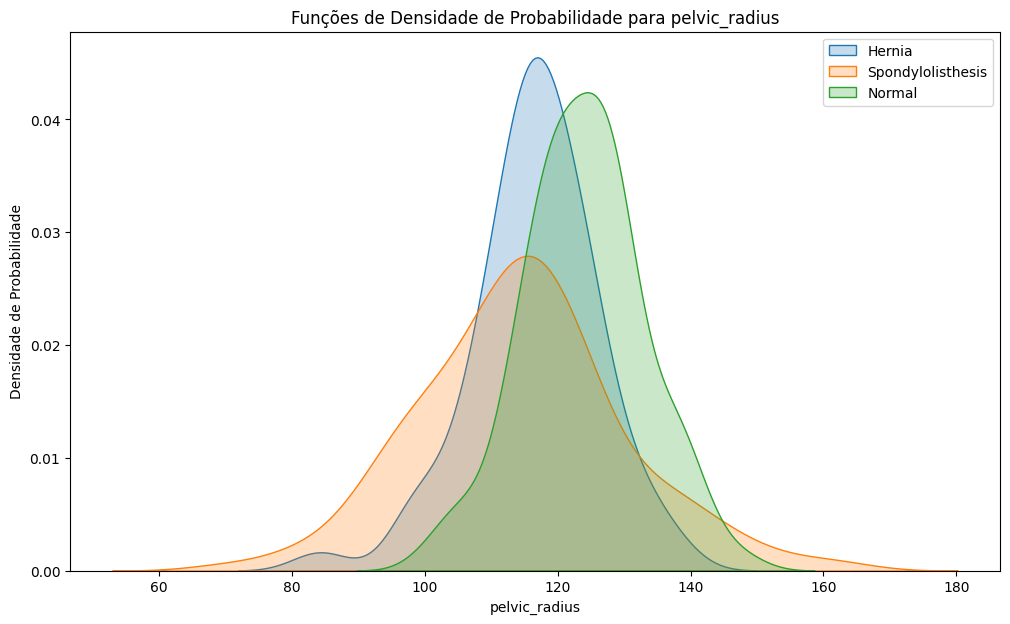

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

hernia = df[df['class'] == 'Hernia']
spondylolisthesis = df[df['class'] == 'Spondylolisthesis']
normal = df[df['class'] == 'Normal']

#Graphic1
plt.figure(figsize=(12,7))
sns.kdeplot(hernia['degree_spondylolisthesis'], label= 'Hernia', fill = True)
sns.kdeplot(spondylolisthesis['degree_spondylolisthesis'], label= 'Spondylolisthesis', fill = True)
sns.kdeplot(normal['degree_spondylolisthesis'], label= 'Normal', fill = True)
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.title('Funções de Densidade de Probabilidade para degree_spondylolisthesis')
plt.show()

#Graphic2
plt.figure(figsize=(12,7))
sns.kdeplot(hernia['pelvic_radius'], label= 'Hernia', fill = True)
sns.kdeplot(spondylolisthesis['pelvic_radius'], label= 'Spondylolisthesis', fill = True)
sns.kdeplot(normal['pelvic_radius'], label= 'Normal', fill = True)
plt.xlabel('pelvic_radius')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.title('Funções de Densidade de Probabilidade para pelvic_radius')
plt.show()

**Question 2**

Split the dataset into training and testing samples. Evaluate the accuracy of the tree for different depths.

In [34]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                             train_size=0.7, stratify=target, random_state=0)

final_acc1, final_acc2 = np.array([]), np.array([])
std1, std2 = np.array([]), np.array([])

for depth in depth_limits:
    acc_folder1, acc_folder2 = np.array([]), np.array([])
    for i in range(10):
        tree2 = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        tree2.fit(variables_train, target_train)
        
        y_pred1 = tree2.predict(variables_test)
        y_pred2 = tree2.predict(variables_train)
        
        acc_folder2 = np.append(acc_folder2, round(metrics.accuracy_score(target_train, y_pred2),2))
        acc_folder1 = np.append(acc_folder1, round(metrics.accuracy_score(target_test, y_pred1),2))
    
    final_acc1 = np.append(final_acc1, np.mean(np.array(acc_folder1)))
    final_acc2 = np.append(final_acc2, np.mean(np.array(acc_folder2)))
    std1 =np.append(std1, np.std(acc_folder1))
    std2 =np.append(std2, np.std(acc_folder2))
    
print("accuracy test list:", final_acc1)
print("accuracy train list:", final_acc2)

accuracy test list: [0.75  0.78  0.78  0.853 0.854 0.831 0.813 0.821]
accuracy train list: [0.78 0.84 0.85 0.9  0.93 0.97 1.   1.  ]


The accuracy lists contain the average accuracy of the 10 trees for each depth.

Within the for loop, the mean and standard deviation were calculated to plot the graphs with error bars.

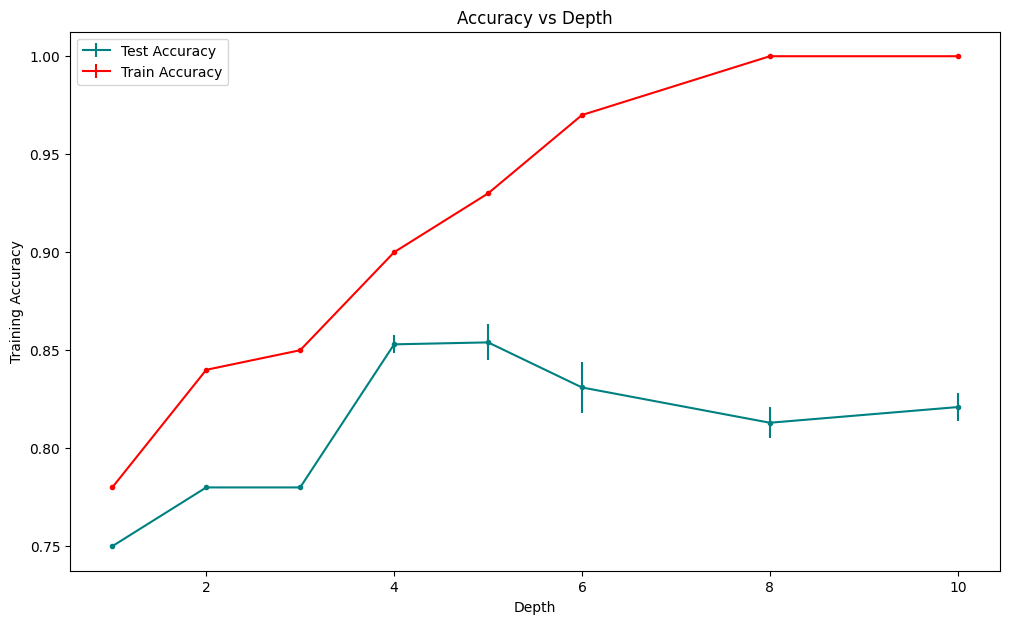

In [35]:
#Graphics
plt.figure(figsize=(12,7))
plt.errorbar(depth_limits, final_acc1, yerr=std1, label='Test Accuracy', color='#008080')
plt.errorbar(depth_limits, final_acc2, yerr=std2, label='Train Accuracy', color='red')
plt.plot(depth_limits, final_acc1, 'o', color='#008080', markersize=3)
plt.plot(depth_limits, final_acc2, 'o', color='red', markersize=3)
plt.title("Accuracy vs Depth")
plt.ylabel("Training Accuracy")
plt.xlabel("Depth")
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0)) #move the legend to the left
plt.show() 

**Question 3**

Starting from depth 4, the test accuracy begins to decrease, indicating that there is overfitting. Beyond this depth, the tree overly tailors itself to the training sample and becomes overly specific.

**Question 4**

Create the tree with "random_state=0" and a minimum of 20 observations per leaf to avoid overfitting, train it with the entire sample, and finally, visualize it.

accuracy: 0.88


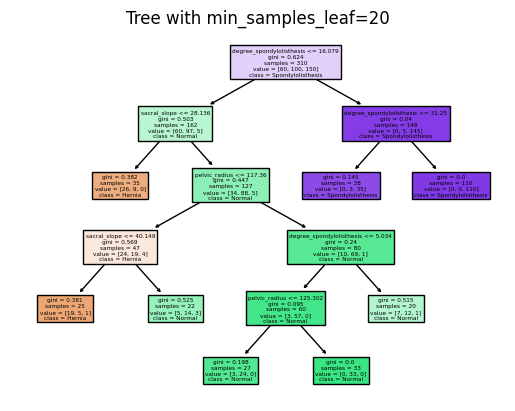

In [36]:
from sklearn import tree

tree4 = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, random_state=0)
tree4.fit(variables, target)
target_pred = tree4.predict(variables)

print('accuracy:', round(metrics.accuracy_score(target, target_pred), 2))

tree.plot_tree(tree4, filled=True, feature_names=variables.columns, class_names=tree4.classes_)
plt.title("Tree with min_samples_leaf=20")
plt.show()